# Hotel Reservations Predict - v1.0

#### About this file

The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.

### Data Dictionary

<b>Booking_ID</b>: unique identifier of each booking<br>
<b>no_of_adults</b>: Number of adults<br>
<b>no_of_children</b>: Number of Children<br>
<b>no_of_weekend_nights</b>: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel<br>
<b>no_of_week_nights</b>: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel<br>
<b>type_of_meal_plan</b>: Type of meal plan booked by the customer:<br>
<b>required_car_parking_space</b>: Does the customer require a car parking space? (0 - No, 1- Yes)<br>
<b>room_type_reserved</b>: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.<br>
<b>lead_time</b>: Number of days between the date of booking and the arrival date<br>
<b>arrival_year</b>: Year of arrival date<br>
<b>arrival_month</b>: Month of arrival date<br>
<b>arrival_date</b>: Date of the month<br>
<b>market_segment_type</b>: Market segment designation.<br>
<b>repeated_guest</b>: Is the customer a repeated guest? (0 - No, 1- Yes)<br>
<b>no_of_previous_cancellations</b>: Number of previous bookings that were canceled by the customer prior to the current booking<br>
<b>no_of_previous_bookings_not_canceled</b>: Number of previous bookings not canceled by the customer prior to the current booking<br>
<b>avg_price_per_room</b>: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)<br>
<b>no_of_special_requests</b>: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)<br>
<b>booking_status</b>: Flag indicating if the booking was canceled or not.<br>

Source: <a href='https://www.kaggle.com'>kaggle.com</a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Data preparation and visualization
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

## Data preparation and visualization

In [2]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
# Checking values of string types.
for i in df[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']]:
    print(i+': '+df[i].unique())

['type_of_meal_plan: Meal Plan 1' 'type_of_meal_plan: Not Selected'
 'type_of_meal_plan: Meal Plan 2' 'type_of_meal_plan: Meal Plan 3']
['room_type_reserved: Room_Type 1' 'room_type_reserved: Room_Type 4'
 'room_type_reserved: Room_Type 2' 'room_type_reserved: Room_Type 6'
 'room_type_reserved: Room_Type 5' 'room_type_reserved: Room_Type 7'
 'room_type_reserved: Room_Type 3']
['market_segment_type: Offline' 'market_segment_type: Online'
 'market_segment_type: Corporate' 'market_segment_type: Aviation'
 'market_segment_type: Complementary']
['booking_status: Not_Canceled' 'booking_status: Canceled']


In [6]:
# Decision for "X" variables: encode manually.

df.type_of_meal_plan.replace({
    'Not Selected': 0,
    'Meal Plan 1': 1,
    'Meal Plan 2': 2,
    'Meal Plan 3': 3,
}, inplace = True)

df.room_type_reserved.replace({
    'Room_Type 1': 1,
    'Room_Type 2': 2,
    'Room_Type 3': 3,
    'Room_Type 4': 4,
    'Room_Type 5': 5,
    'Room_Type 6': 6,
    'Room_Type 7': 7,
}, inplace = True)

df.market_segment_type.replace({
    'Offline': 1,
    'Online': 2,
    'Corporate': 3,
    'Aviation': 4,
    'Complementary': 5,
}, inplace = True)

In [7]:
# Target variable: 1 - Not Canceled / 0 - Canceled

df.booking_status.replace({
    'Not_Canceled': 1,
    'Canceled': 0,
}, inplace = True)

# Delete ID column
del df['Booking_ID']

In [8]:
# Clean base
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,1,0,0,0,65.00,0,1
1,2,0,2,3,0,0,1,5,2018,11,6,2,0,0,0,106.68,1,1
2,1,0,2,1,1,0,1,1,2018,2,28,2,0,0,0,60.00,0,0
3,2,0,0,2,1,0,1,211,2018,5,20,2,0,0,0,100.00,0,0
4,2,0,1,1,0,0,1,48,2018,4,11,2,0,0,0,94.50,0,0


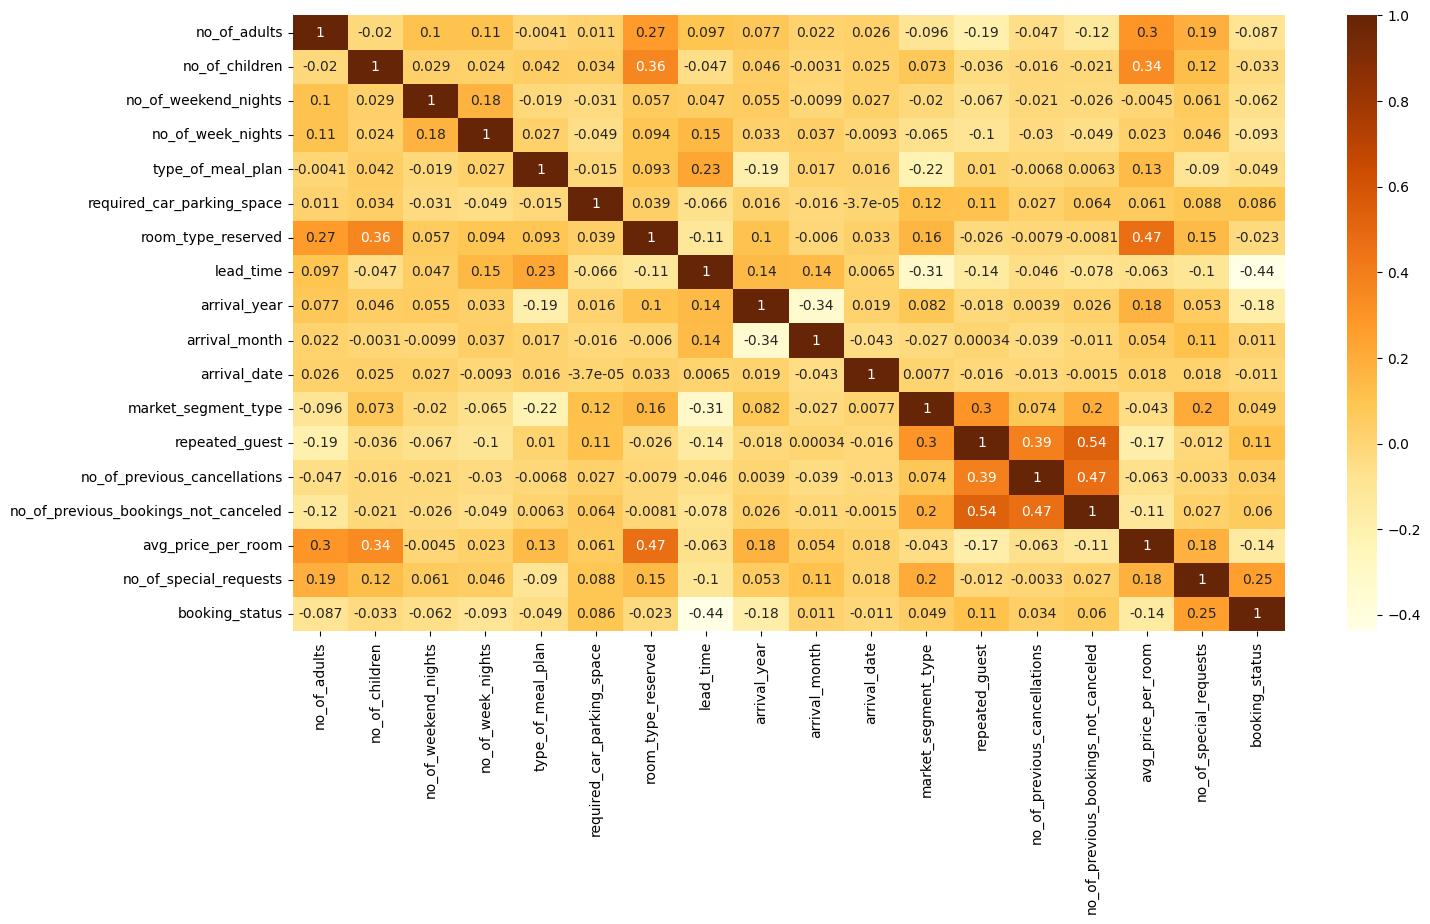

In [9]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr')
plt.show()

## Machine Learning

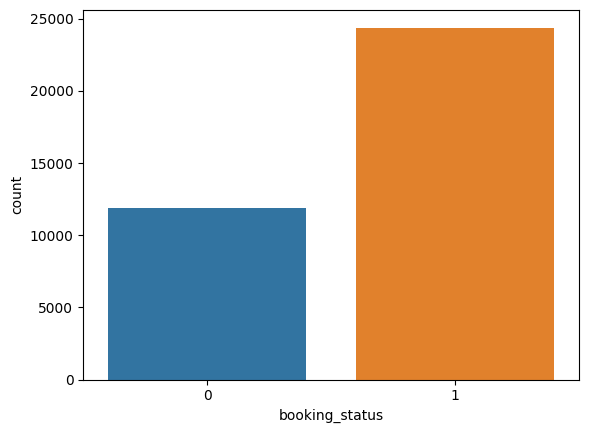

In [10]:
# Load balance
sns.countplot(df, x='booking_status')
plt.show()

In [11]:
x = df.drop(columns={'booking_status'})
y = df['booking_status']

In [12]:
bal = SMOTE()

In [13]:
xbal, ybal = bal.fit_resample(x,y)

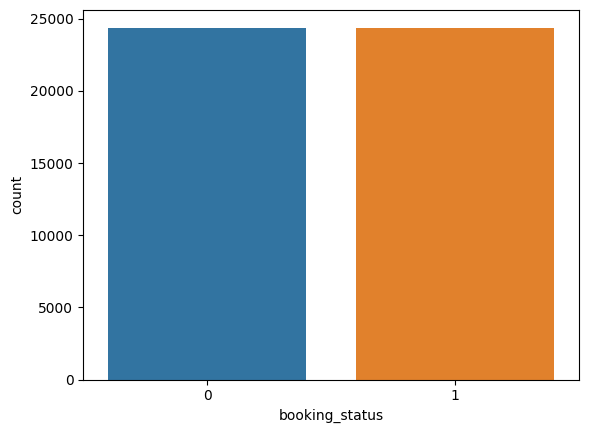

In [14]:
# Load balance
sns.countplot(pd.DataFrame(ybal),x='booking_status')
plt.show()

In [15]:
# Spliting dataset
xtrain, xtest, ytrain, ytest = train_test_split(xbal, ybal, test_size=0.2)

### Prediction with RandomForestClassifier

In [16]:
model = RandomForestClassifier()
model.fit(xtrain,ytrain)
predictions = model.predict(xtest)
accuracy_score(ytest,predictions)
print('RandomForestClassifier accuracy: ' + str(round(accuracy_score(predictions,ytest),2)*100) + '%')

RandomForestClassifier accuracy: 92.0%


In [17]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4921
           1       0.91      0.93      0.92      4835

    accuracy                           0.92      9756
   macro avg       0.92      0.92      0.92      9756
weighted avg       0.92      0.92      0.92      9756



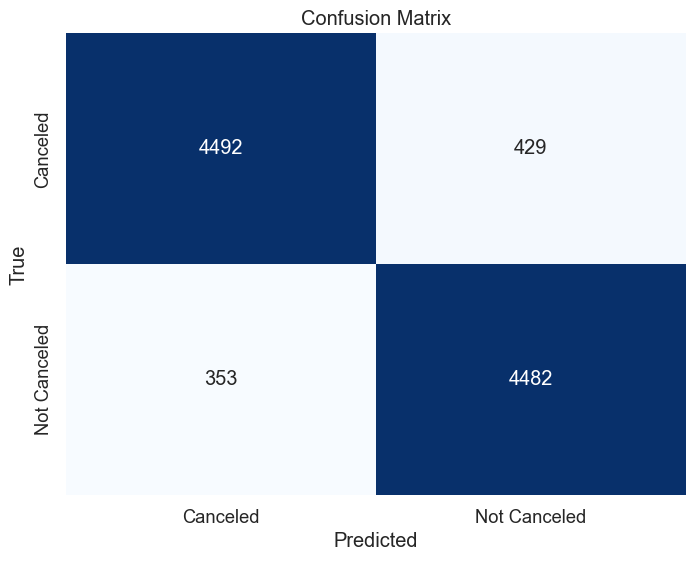

In [18]:
cm = confusion_matrix(ytest,predictions)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta o tamanho da fonte
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Canceled', 'Not Canceled'],
            yticklabels=['Canceled', 'Not Canceled'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

### Dummy Prediction

In [19]:
modelDummy = DummyClassifier()
modelDummy.fit(xtrain,ytrain)
dummyPredictions = modelDummy.predict(xtest)
print('Dummy accuracy: ' + str(accuracy_score(ytest,dummyPredictions)))

Dummy accuracy: 0.49559245592455925


In [20]:
print(classification_report(ytest,dummyPredictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4921
           1       0.50      1.00      0.66      4835

    accuracy                           0.50      9756
   macro avg       0.25      0.50      0.33      9756
weighted avg       0.25      0.50      0.33      9756



##### Dummy prediction's accuracy is around 50%, while our model's arround 90%.

### Cross-Validation

In [21]:
# Cross-validation
cv = cross_validate(model, xbal, ybal, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

# Results
print('-'*15 + ' Metric values ' + 15*'-')
print('')
print("Accuracy:", cv['test_accuracy'])
print("Precision:", cv['test_precision_macro'])
print("Recall:", cv['test_recall_macro'])
print("F1 Score:", cv['test_f1_macro'])

--------------- Metric values ---------------

Accuracy: [0.89708897 0.89678147 0.92394424 0.94587946 0.94311193]
Precision: [0.89926358 0.89850716 0.92397874 0.94638402 0.94355978]
Recall: [0.89708897 0.89678147 0.92394424 0.94587946 0.94311193]
F1 Score: [0.89694865 0.8966696  0.92394269 0.94586416 0.94309757]


### Optimizing model

In [22]:
# Grid params for RandomForestClassifier

params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 2, 3],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2],
}

grid_search = GridSearchCV(model, param_grid=params)
grid_search.fit(xbal, ybal)

print("Best params found:")
print(grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best params found:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best score: 0.9207872078720787


### Adjusted model

In [23]:
model = RandomForestClassifier(max_depth= None, min_samples_leaf=1, min_samples_split=2, n_estimators=150)
model.fit(xtrain,ytrain)
predictions = model.predict(xtest)
accuracy_score(ytest,predictions)
print('RandomForestClassifier accuracy: ' + str(round(accuracy_score(predictions,ytest),2)*100) + '%')
print(classification_report(ytest,predictions))

RandomForestClassifier accuracy: 92.0%
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4921
           1       0.91      0.93      0.92      4835

    accuracy                           0.92      9756
   macro avg       0.92      0.92      0.92      9756
weighted avg       0.92      0.92      0.92      9756



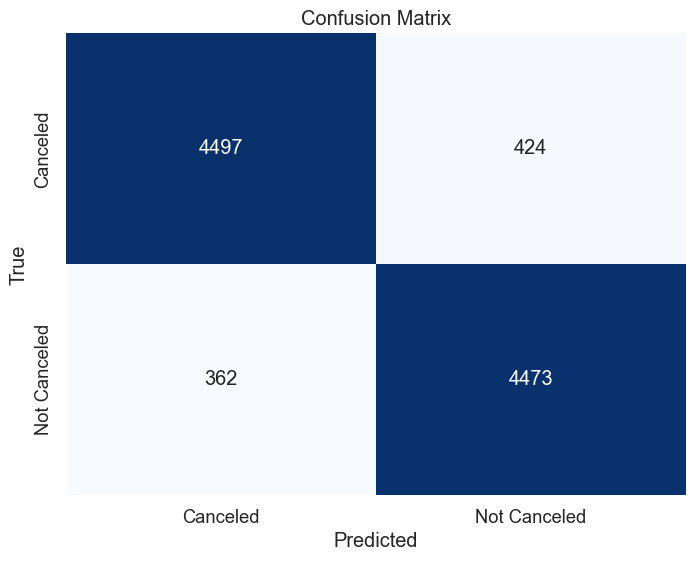

In [24]:
cm2 = confusion_matrix(ytest,predictions)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajusta o tamanho da fonte
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Canceled', 'Not Canceled'],
            yticklabels=['Canceled', 'Not Canceled'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

## Conclusion

### This model is able to predict, with 92% accuracy, if the hotel reservation will be canceled or not, helping to create customer retention and loyalty mechanisms.